### Determining the house Prices in King County, USA

#### Importing the needed libraries

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

#### Module 1: Importing the Dataset

In [37]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
data = pd.read_csv(path)

Question 1:
<br> **Display the data types of each column**

In [38]:
data.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### Module 2: Data wrangling

Question 2:
Drop the column `id` and the column `Unnamed: 0`, then show a statistical summary of the data.  

In [39]:
data.drop(data[["Unnamed: 0","id"]], axis =1, inplace = True )

data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The featues `bedrooms` and `bathrooms` have missing values, it can be spoted in the above output when the `count` rows shows a smaller number for these two features.

In [40]:
# To show how many missing values each  features hasÇ
print("The number of missinf values in the feature bathrooms is:", data[["bathrooms"]].isnull().sum())
print("The number of missinf values in the feature bedrooms is:", data[["bedrooms"]].isnull().sum())

The number of missinf values in the feature bathrooms is: bathrooms    10
dtype: int64
The number of missinf values in the feature bedrooms is: bedrooms    13
dtype: int64


Let us replace the missing values of 'bathrooms' and 'bedrooms' by their mean

In [43]:
# replacing the valus for their means:
mean_bath=data['bathrooms'].mean()
mean_bed=data['bedrooms'].mean()


data["bathrooms"].replace(np.nan, mean_bath, inplace = True)
data["bedrooms"].replace(np.nan, mean_bed, inplace = True)


#Lets recheck the values now after they being replaced:
# To show how many missing values each  features hasÇ
print("The number of missinf values in the feature bathrooms is:", data[["bathrooms"]].isnull().sum())
print("The number of missinf values in the feature bedrooms is:", data[["bedrooms"]].isnull().sum())

The number of missinf values in the feature bathrooms is: bathrooms    0
dtype: int64
The number of missinf values in the feature bedrooms is: bedrooms    0
dtype: int64


In [42]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Module 3:  Exploratory Data Analysis

Question 3 
<br>Count the number of house with unique floor values

In [51]:
data["floors"].value_counts().to_frame()


,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Question 4:
<br>Use `boxplot` to determine whether house with waterfront view or without waterfront view have more price outliers.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

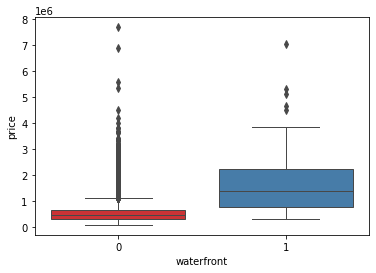

In [73]:
sns.boxplot(x= "waterfront", y = "price", data = data, linewidth = 1, palette = "Set1" )

Question 5:
<br> Use the `regplot` method to observe the linear relationship  between `sqft_above` and price

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

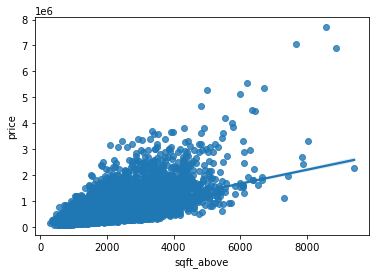

In [76]:
sns.regplot(x= "sqft_above", y = "price", data = data)

Use the method `corr()` to find the correlations between the features and price.

In [78]:
data.corr()["price"].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

#### Module 4: Model Development 


Question: 6
<br> Fit a linear regression model to predict the `price` taking `sqft_living` as explanatory variable, then calculate the `R^2` of the model 

In [102]:
a= LinearRegression().fit(data[["sqft_living"]], data["price"]).score(data[["sqft_living"]], data["price"])
print("The R^2 values is:", a)

The R^2 values is: 0.4928532179037931


Question: 7
<br> Fit a linear model to predict the price using the following features:

`"floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"`
<br> and calculate the R^2 of the model

In [103]:
X_features = data[["floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
b= LinearRegression().fit(X_features, data["price"]).score(X_features, data["price"])
print("The R^2 values is:", b)

The R^2 values is: 0.6576885711683069


Question 8:
<br> Use a `pipeline` to predict the `price`, fit the object using the features used in the `Question 7` and calculate the R^2

In [90]:
# creating the pipeline:

input=[("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias = False)), ("model",  LinearRegression())]

pipe = Pipeline(input)

pipe.fit(X_features, data["price"]).score(X_features, data["price"])


0.7513387707402615

#### Module 5: Model Evaluation and Refinement

Question 9:
<br> Create and fit a `Ridge Regression` object using the training data, setting the regularization parameter to `0.1` and calculate the `R^2`  using the testing data. 

In [95]:
# Spliting the data set into training and testing data. test  size will be 15% of the total dataset

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
x = data[features]
x_train, x_test, y_train, y_test = train_test_split(x, data["price"], test_size=0.15, random_state=1)


# creating and fitting the Ridge Regression Object:

r = Ridge(alpha = 0.1).fit(x_train, y_train).score(x_test, y_test)

print("The R^2 is :", r)

The R^2 is : 0.6478759163939118


Question 10:
<br> Perform a `second order polynomial` transform on both, training and testing data.
<br> Create and fit a `Ridge Regression` object using the training data, setting the regularization parameter to `0.1`.
<br> Calculate the `R^2` using the testing data.

In [101]:
#  Making the second order Transformation
x_train_tr = PolynomialFeatures(degree = 2 ).fit_transform(x_train) 
x_test_tr = PolynomialFeatures(degree = 2 ).fit_transform(x_test)


# Creating and fitting the Ridge Regression Object:

R = Ridge(alpha = 0.1).fit(x_train_tr, y_train).score(x_test_tr, y_test)

print("The R^2 is :", R)


The R^2 is : 0.7002744279539594
